# SI 618 - Homework #6: Machine Learning 1

Version 2023.11.01.1.CT

In this homework exercise you will apply the machine learning techniques we've covered so far: 
machine learning pipelines, dimension reduction, and clustering.

You will be using the [customer personality analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) from Kaggle.

**NOTE:** This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

A reminder (from the syllabus):
> Unless stated otherwise in an assignment, you are permitted to use generative AI (e.g. ChatGPT, Copilot, etc.) but you must indicate  that you did so in the work that you submit.  **If you fail to 
>  disclose your use of generative AI you will receive a grade of
> zero on the assignment**.

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'shreyadj' 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

## Task 1 (10 points):
Perform exploratory data analyses on the variables in this dataset.  Your work should include both
numerical **and** graphical overviews of the data.  Explain your findings.  

In [2]:
marketing = pd.read_csv('marketing_campaign.csv', sep ='\t')

In [3]:
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
marketing.shape

(2240, 29)

In [5]:
marketing.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [6]:
marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


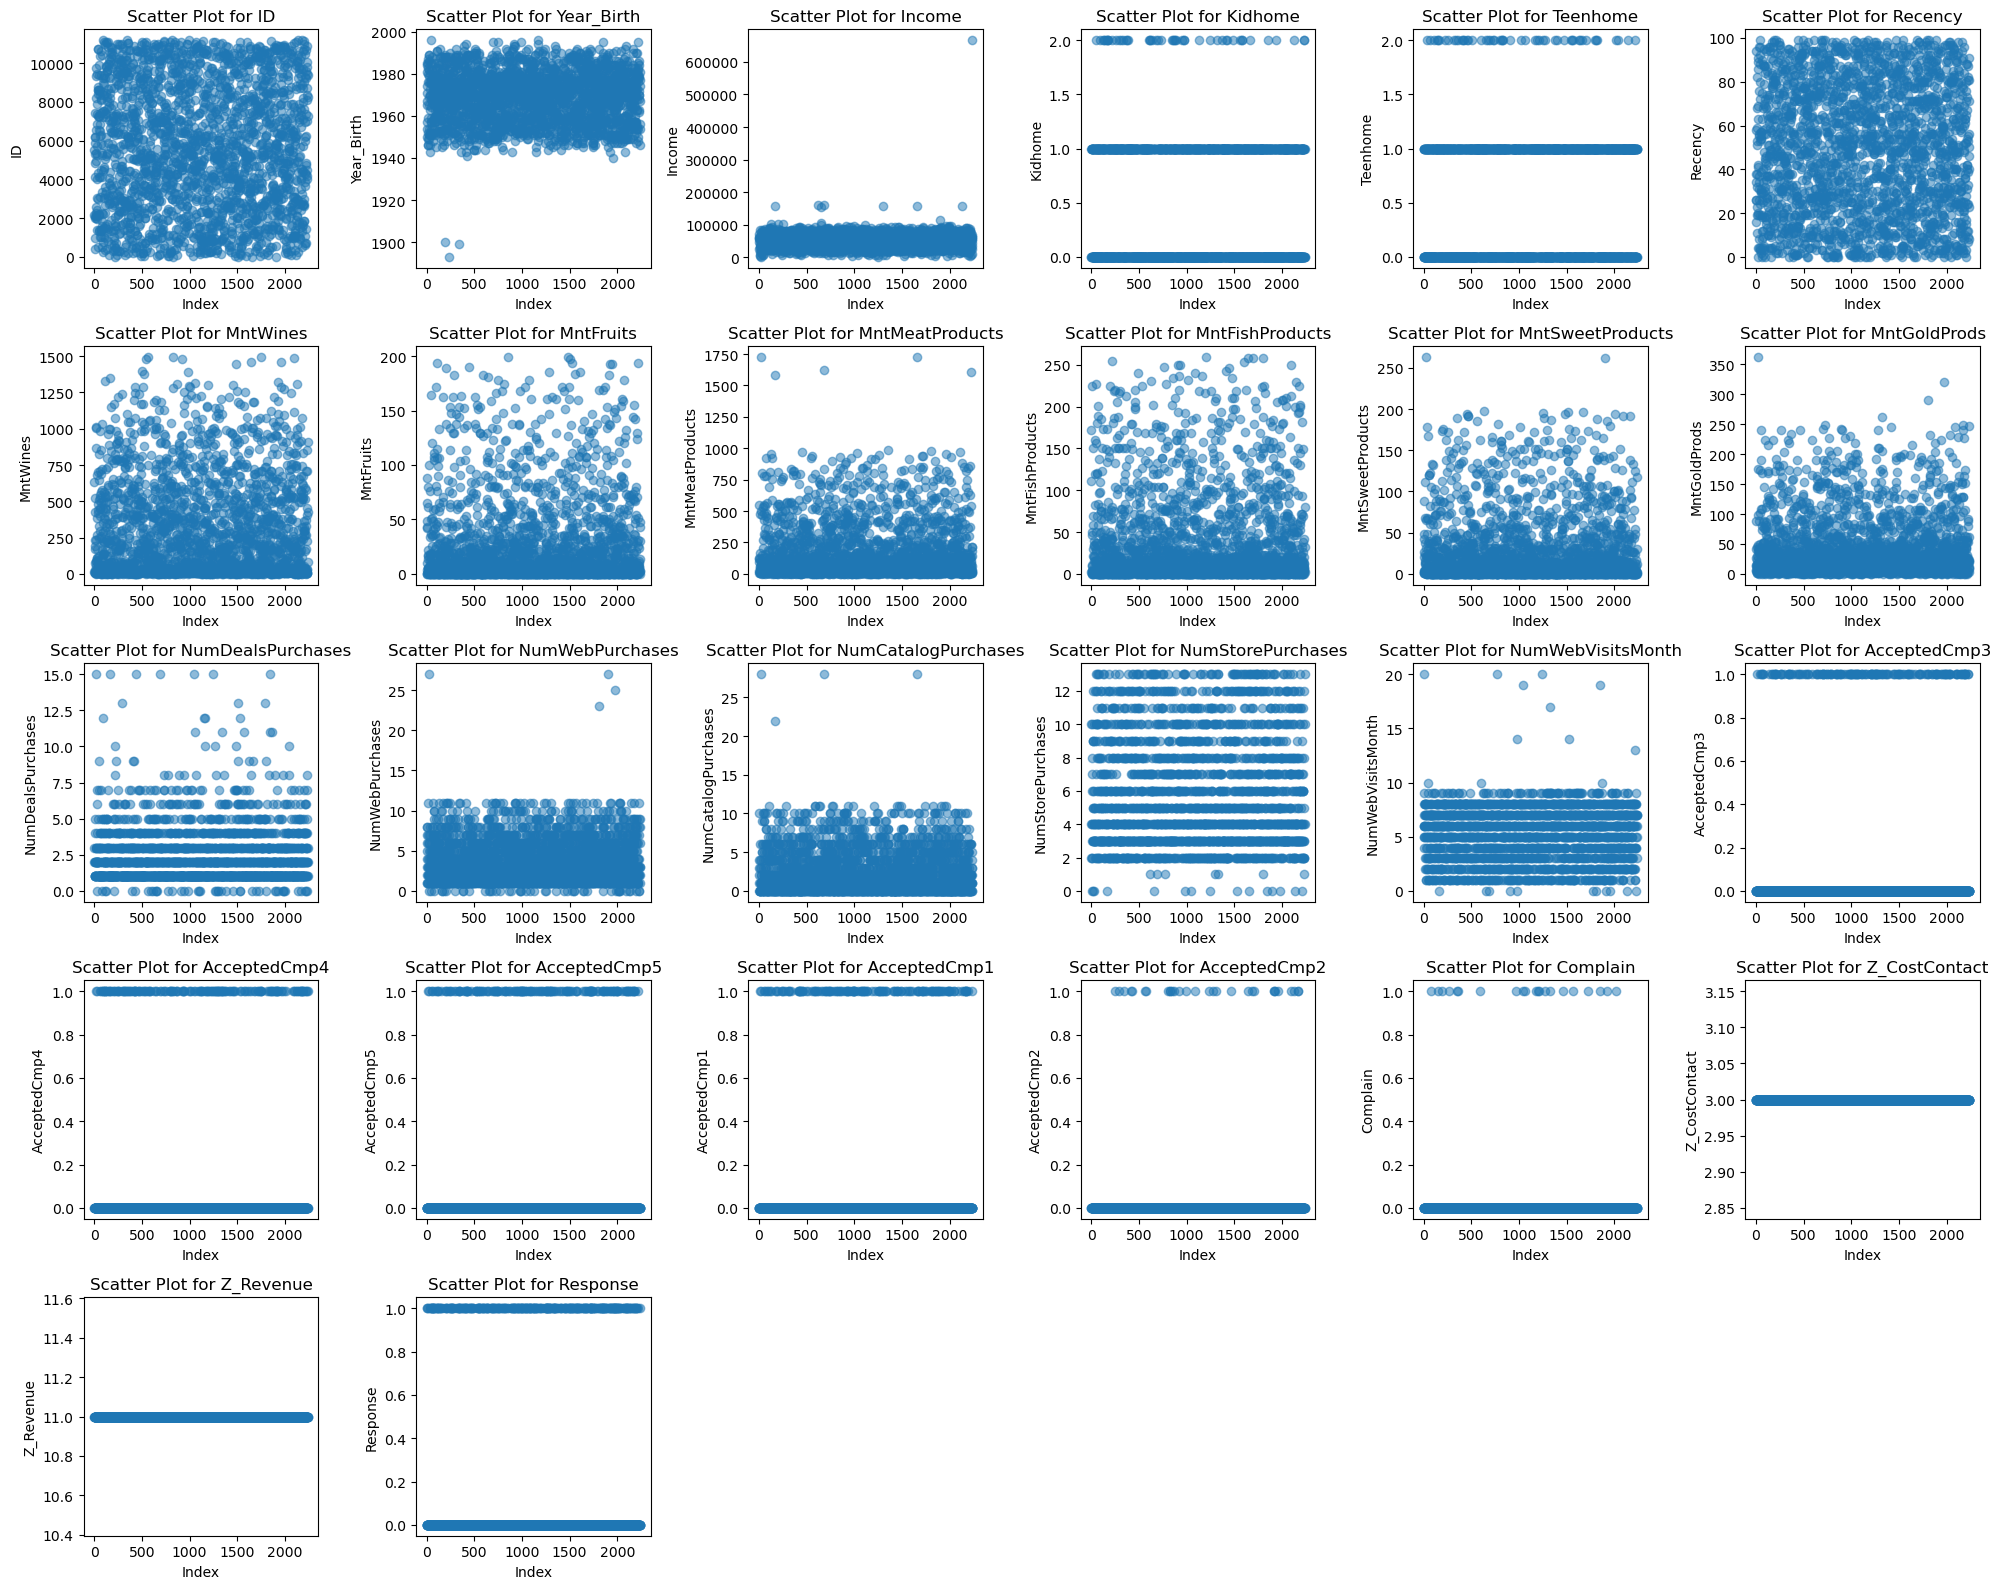

In [12]:
numerical_columns = marketing.select_dtypes(include=['number'])

num_rows = 5  
num_cols = 6  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 16))
axes = axes.flatten()

# Create scatter plots for each numerical feature
for i, column in enumerate(numerical_columns.columns):
    ax = axes[i]
    ax.scatter(marketing.index, marketing[column], alpha=0.5)
    ax.set_title(f"Scatter Plot for {column}")
    ax.set_xlabel("Index")
    ax.set_ylabel(column)

# Remove any empty subplots if the number of numerical columns is less than num_rows * num_cols
for i in range(len(numerical_columns.columns), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


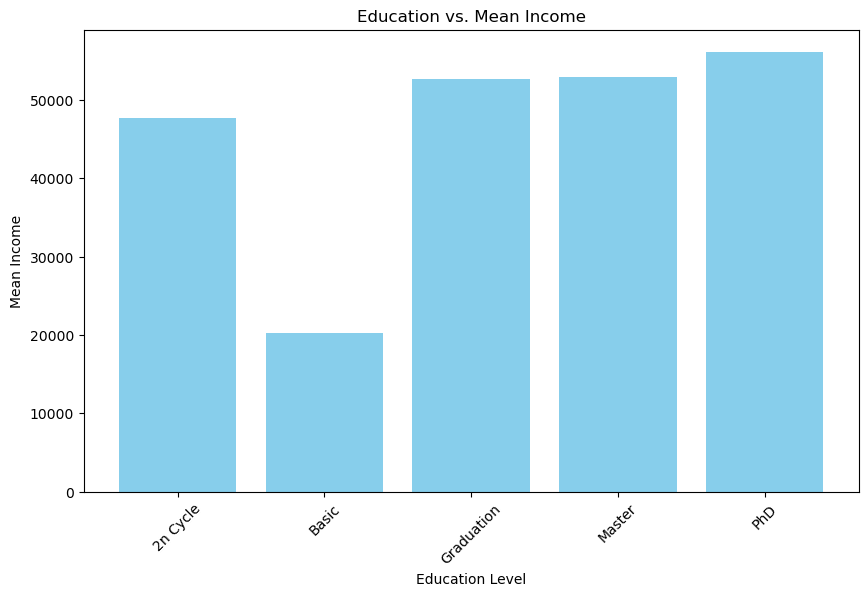

In [10]:
# Group the data by unique values in the "Education" column and calculate the mean income for each group
education_income_mean = marketing.groupby('Education')['Income'].mean()

# Get the unique education levels
unique_education_levels = education_income_mean.index

# Create a bar plot (histogram) for education vs. mean income
plt.figure(figsize=(10, 6))
plt.bar(unique_education_levels, education_income_mean, color='skyblue')
plt.title("Education vs. Mean Income")
plt.xlabel("Education Level")
plt.ylabel("Mean Income")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Insert your explanations and interpretations here. You may use multiple cells if you wish.

## Task 2 (1 point): Drop all columns that have constant values.

In [10]:
#drop columns with constant values
marketing = marketing.drop(['AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2',	'Complain',	'Z_CostContact', 'Z_Revenue'], axis = 1)
marketing
# can be done using unique() function as well

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,546,172,88,88,3,8,10,4,7,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,6,2,1,6,2,1,1,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,127,111,21,42,1,8,2,10,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,20,10,3,5,2,2,0,4,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,118,46,27,15,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,182,42,118,247,2,9,3,4,5,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,30,0,0,8,7,8,2,5,7,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,217,32,12,24,1,2,3,13,6,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,214,80,30,61,2,6,5,10,3,0


## Task 3 (1 point):
Create a new variable `In_Relationship` whose value is 1 if the value of `Marital_Status` is "Married" or "Together" and 0 otherwise.  Drop the `Marital_Status` column.

In [11]:
# Create a new variable `In_Relationship` whose value is 1 if the value of `Marital_Status` is "Married" or "Together" and 0 otherwise.
marketing['In_Relationship'] = marketing['Marital_Status'].apply(lambda x: 1 if x == 'Married' or x == 'Together' else 0)

In [12]:
marketing.drop(['Marital_Status'], axis = 1, inplace = True)

## Task 4 (3 points):
Impute missing income values with the median income.  Explain your results (i.e. what the median value was, how many values were imputed, how reliable you think the median value is, etc.).

In [13]:
marketing['Income'].isnull().sum()

24

In [14]:
median = marketing['Income'].median()
median

51381.5

In [15]:
marketing['Income'].fillna(median, inplace = True)

In [16]:
marketing

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,In_Relationship
0,5524,1957,Graduation,58138.0,0,0,04-09-2012,58,635,88,...,172,88,88,3,8,10,4,7,1,0
1,2174,1954,Graduation,46344.0,1,1,08-03-2014,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,71613.0,0,0,21-08-2013,26,426,49,...,111,21,42,1,8,2,10,4,0,1
3,6182,1984,Graduation,26646.0,1,0,10-02-2014,26,11,4,...,10,3,5,2,2,0,4,6,0,1
4,5324,1981,PhD,58293.0,1,0,19-01-2014,94,173,43,...,46,27,15,5,5,3,6,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,61223.0,0,1,13-06-2013,46,709,43,...,42,118,247,2,9,3,4,5,0,1
2236,4001,1946,PhD,64014.0,2,1,10-06-2014,56,406,0,...,0,0,8,7,8,2,5,7,0,1
2237,7270,1981,Graduation,56981.0,0,0,25-01-2014,91,908,48,...,32,12,24,1,2,3,13,6,0,0
2238,8235,1956,Master,69245.0,0,1,24-01-2014,8,428,30,...,80,30,61,2,6,5,10,3,0,1


Insert your explanation here.

## Task 5 (15 points):
Use scikit-learn to conduct a linear regression that models the amount spend on wine (`MntWines`) based on `Income` and whether they are in a relationship (`In_Relationship`).  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.  Explain what your value of RMSE means, and comment on how good you think your model is based on the RMSE value means.

In [17]:
X = marketing[['Income', 'In_Relationship']]
y = marketing['MntWines']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 263.62


Insert your explanation and interpretation here.

## Task 6 (20 points):
Conduct an agglomerative clustering analysis to find 4 clusters using average linkage based on PCA projections of the original data onto 5 dimensions (use one-hot encoding on your categorical variables, and remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first 5 principal components. 

Do not create a dendrogram. Instead, create a scatterplot of the first two principal components, colored by cluster membership.  Comment on the results of your clustering analysis.

Repeat the above steps using 7 clusters.  Compare the results to the 4 cluster solution.  Which solution do you prefer and why?

Keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [20]:
marketing['age'] = 2023 - marketing['Year_Birth']
marketing.drop(['Year_Birth', 'Dt_Customer', 'ID'], axis = 1, inplace = True)
# we take age column because there's no point in scaling year of birth. I took 2023 because I am analysing this data in 2023. 

In [21]:
marketing

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,In_Relationship,age
0,Graduation,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1,0,66
1,Graduation,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,69
2,Graduation,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,1,58
3,Graduation,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,1,39
4,PhD,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,1,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,1,56
2236,PhD,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,1,77
2237,Graduation,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,42
2238,Master,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,1,67


In [22]:
# treat educational column as a categorical variable
categorical_features = ['Education']
numerical_features = [col for col in marketing.columns if col != 'Education']

In [23]:
preprocessing = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='first'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])


In [24]:
marketing_prepared = preprocessing.fit_transform(marketing)

In [25]:
marketing_prepared[2238]

array([ 0.        ,  0.        ,  1.        ,  0.        ,  0.67940139,
       -0.82521765,  0.90693402, -1.41971934,  0.36866592,  0.09299156,
        0.20849491,  0.77768317,  0.07116458,  0.32552712, -0.16823634,
        0.68938585,  0.79999587,  1.29523705, -0.95483068, -0.41861211,
        0.74245979,  1.06880747])

In [26]:
len(marketing_prepared[0])

22

In [27]:
pipe = Pipeline(
    [    
    ('pca', PCA(n_components=5,random_state=42)),
    ('cluster', AgglomerativeClustering(n_clusters=4,  linkage='average'))
    ]
)
#how to take random state? 

In [28]:
X_pca_4 = pipe.fit_predict(marketing_prepared)

In [29]:
X_pca_4

array([0, 1, 1, ..., 0, 1, 1])

In [30]:
np.unique(X_pca_4)

array([0, 1, 2, 3])

In [31]:
clustered = pd.concat([marketing, pd.DataFrame(X_pca_4,columns=['cluster'])],axis=1)

In [32]:
clustered

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,In_Relationship,age,cluster
0,Graduation,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1,0,66,0
1,Graduation,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,69,1
2,Graduation,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,1,58,1
3,Graduation,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,1,39,1
4,PhD,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,1,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,1,56,0
2236,PhD,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,1,77,1
2237,Graduation,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,42,0
2238,Master,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,1,67,1


In [33]:
clustered.groupby('cluster').describe().T

cluster                  0             1        2            3
Income count    594.000000   1642.000000      1.0     3.000000
       mean   76162.769360  43665.296590  60182.0  4593.666667
       std    27471.057883  17254.347135      NaN  3187.545503
       min     2447.000000   3502.000000  60182.0  1730.000000
       25%    68695.000000  31106.250000  60182.0  2876.500000
...                    ...           ...      ...          ...
age    min       28.000000     27.000000    130.0    32.000000
       25%       44.000000     46.000000    130.0    42.000000
       50%       53.000000     53.000000    130.0    52.000000
       75%       65.000000     63.000000    130.0    56.000000
       max      124.000000    123.000000    130.0    60.000000

[144 rows x 4 columns]

In [34]:
clustered.groupby('cluster').var()

/var/folders/st/qm8p6yl90sdfx9ds92vpb4lh0000gn/T/ipykernel_50086/2770912499.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clustered.groupby('cluster').var()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,In_Relationship,age
cluster,,,,,,,,,,,,,,,,,,
0,7.546590e+08,0.062911,0.161426,882.266115,103651.098359,2559.907896,62302.838878,4368.632690,2774.705177,3885.975690,2.864020,6.664418,8.598887,8.766533,3.693041,0.203178,0.238793,178.070781
1,2.977125e+08,0.302088,0.293209,823.727257,74444.200241,332.844027,8257.821676,567.922563,374.214883,1680.472713,3.429524,7.330380,3.379938,7.738437,3.750395,0.090931,0.224871,127.766160
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.016045e+07,0.333333,0.333333,399.000000,1637.333333,102.333333,1366.333333,12.000000,40.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,208.000000


In [35]:
clustered.groupby('cluster').describe().T

cluster                  0             1        2            3
Income count    594.000000   1642.000000      1.0     3.000000
       mean   76162.769360  43665.296590  60182.0  4593.666667
       std    27471.057883  17254.347135      NaN  3187.545503
       min     2447.000000   3502.000000  60182.0  1730.000000
       25%    68695.000000  31106.250000  60182.0  2876.500000
...                    ...           ...      ...          ...
age    min       28.000000     27.000000    130.0    32.000000
       25%       44.000000     46.000000    130.0    42.000000
       50%       53.000000     53.000000    130.0    52.000000
       75%       65.000000     63.000000    130.0    56.000000
       max      124.000000    123.000000    130.0    60.000000

[144 rows x 4 columns]

Insert your explanations and interpretations here.

## Task 7 (20 points):
Conduct a k-means clustering of the data.  Pre-process the data using a 5-dimensional PCA (use one-hot encoding on your categorical values and remember to scale your data before doing the PCA). Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the clustering solution using the optimal number of clusters.

Again, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

Compare the results to the agglomerative clustering you did in the previous task.  Which solution do you prefer and why?

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import numpy as np

/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

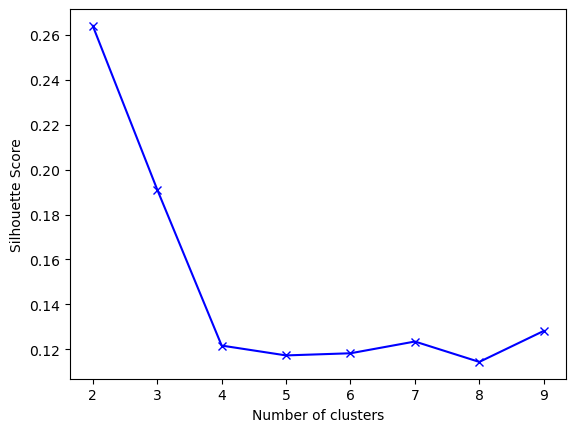

In [37]:
principalComponents = marketing_prepared

# Determine the optimal number of clusters using silhouette score
silhouette_scores = [] 
K = range(2,10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principalComponents)
    silhouette_scores.append(silhouette_score(principalComponents, kmeans.labels_))

# Plotting the silhouette scores
plt.plot(K, silhouette_scores, 'bx-') 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show()

In [38]:
pipe1 = Pipeline([
    ('pca', PCA(n_components=5,random_state=42)),
    ('kmeans', KMeans(n_clusters=2,init='k-means++',random_state=42)),
])

In [39]:
Xformed = marketing_prepared

/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.2640859133236736


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.19112058546714167


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.1216023645830161


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.11721383139267019


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.11817155765597476


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.12340671026228936


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.114314452912614


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.12812794128503532


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.10021902595141903


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 11 The average silhouette_score is : 0.11067278276092249


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 12 The average silhouette_score is : 0.11472002711087594


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 13 The average silhouette_score is : 0.11631480870773969


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 14 The average silhouette_score is : 0.1008946147930416


/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shreya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 15 The average silhouette_score is : 0.11440674435101345


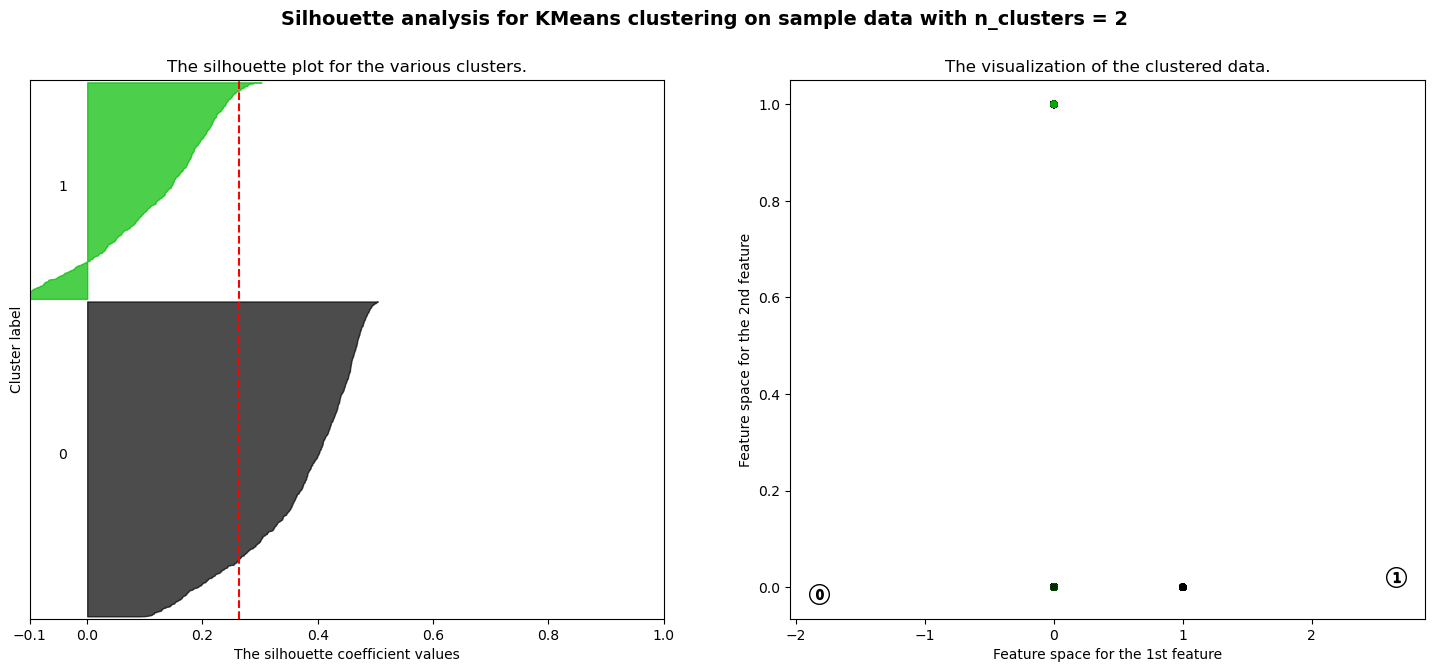

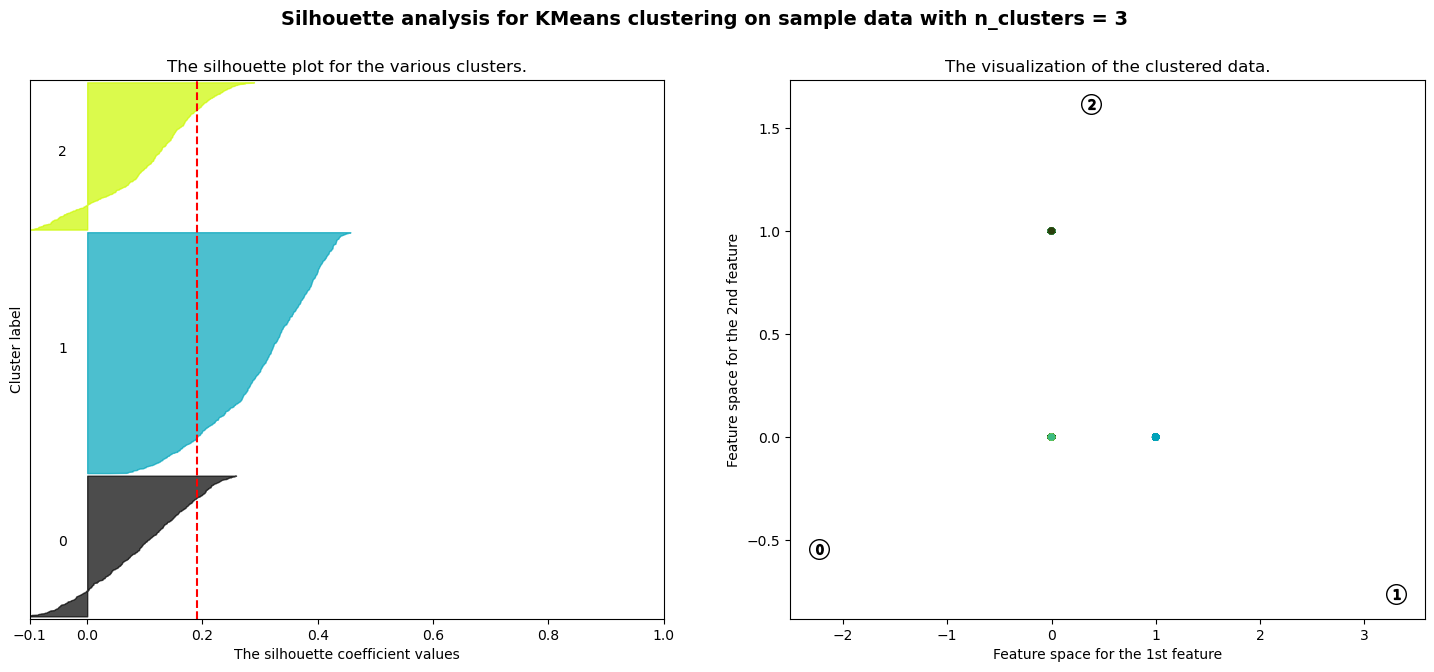

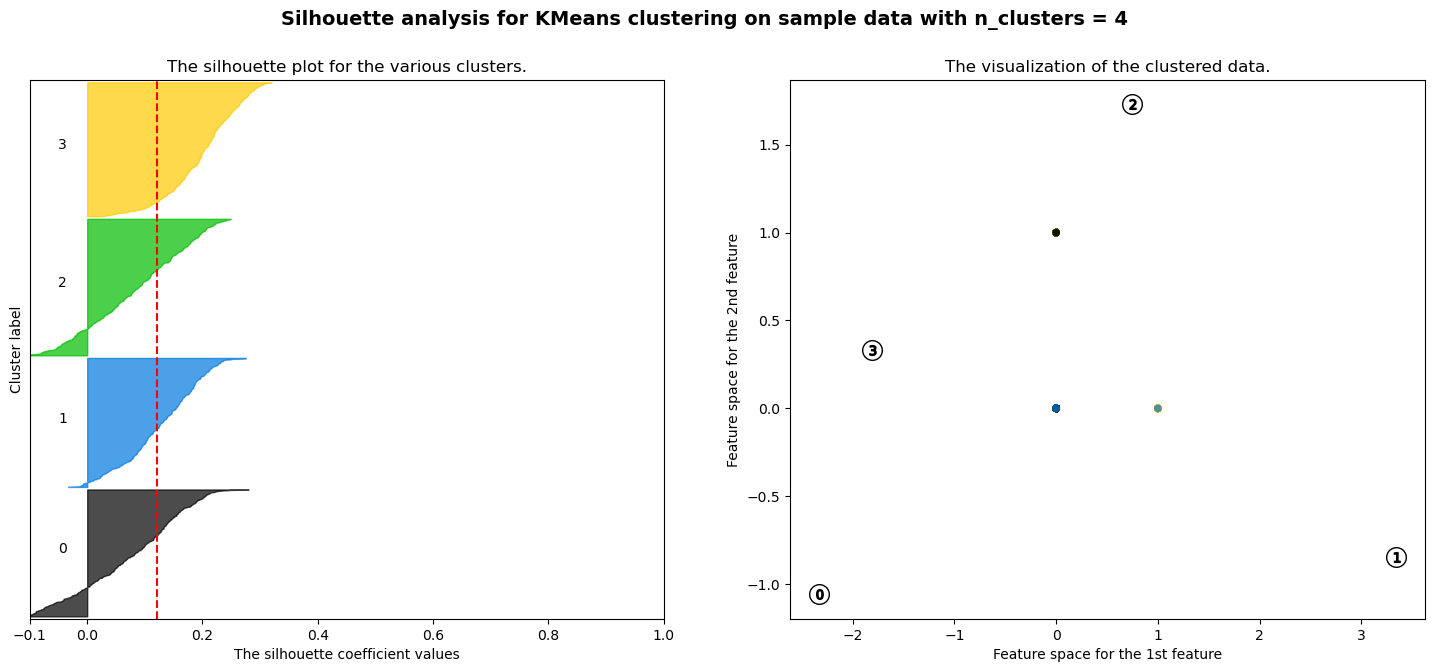

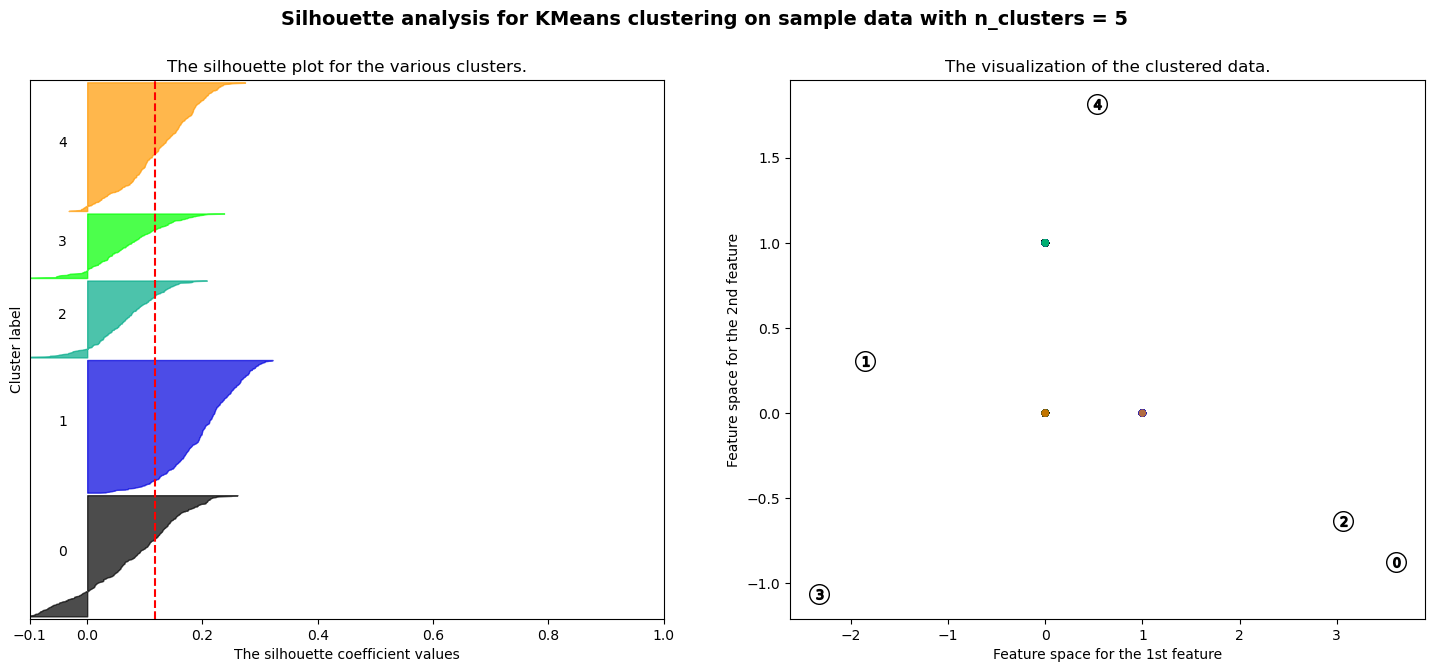

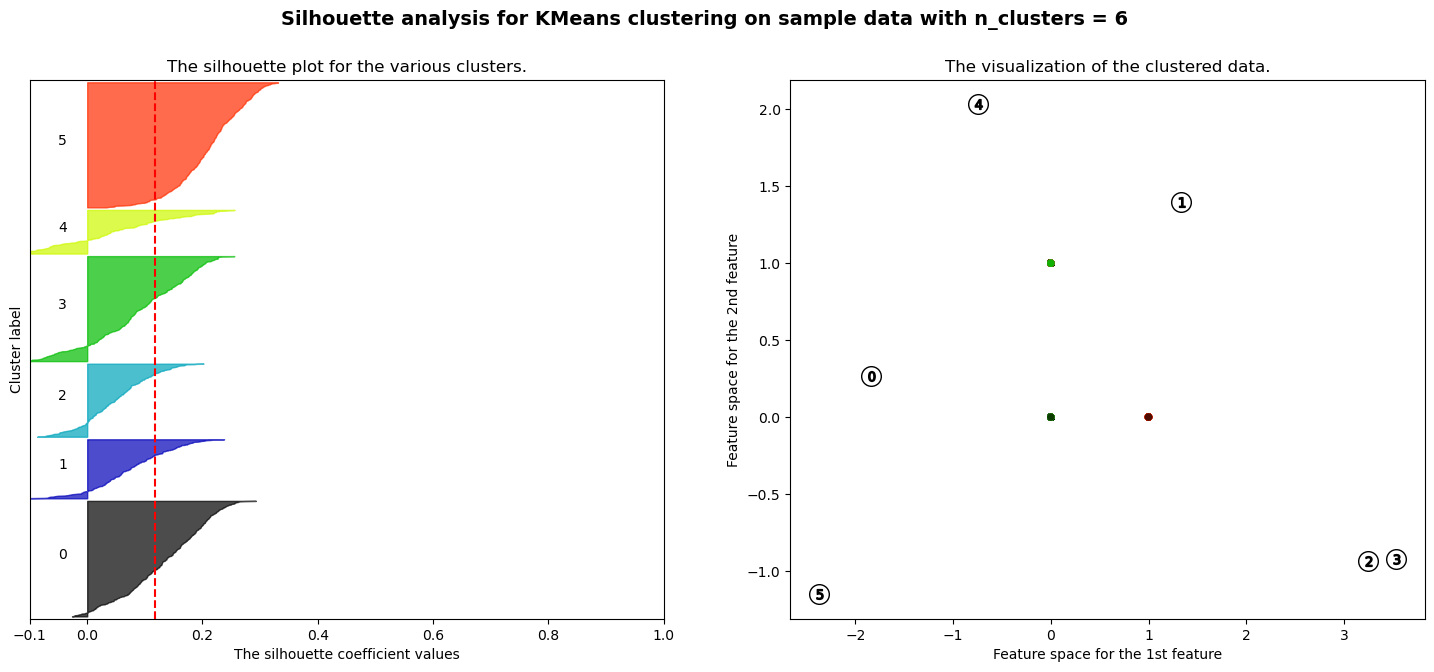

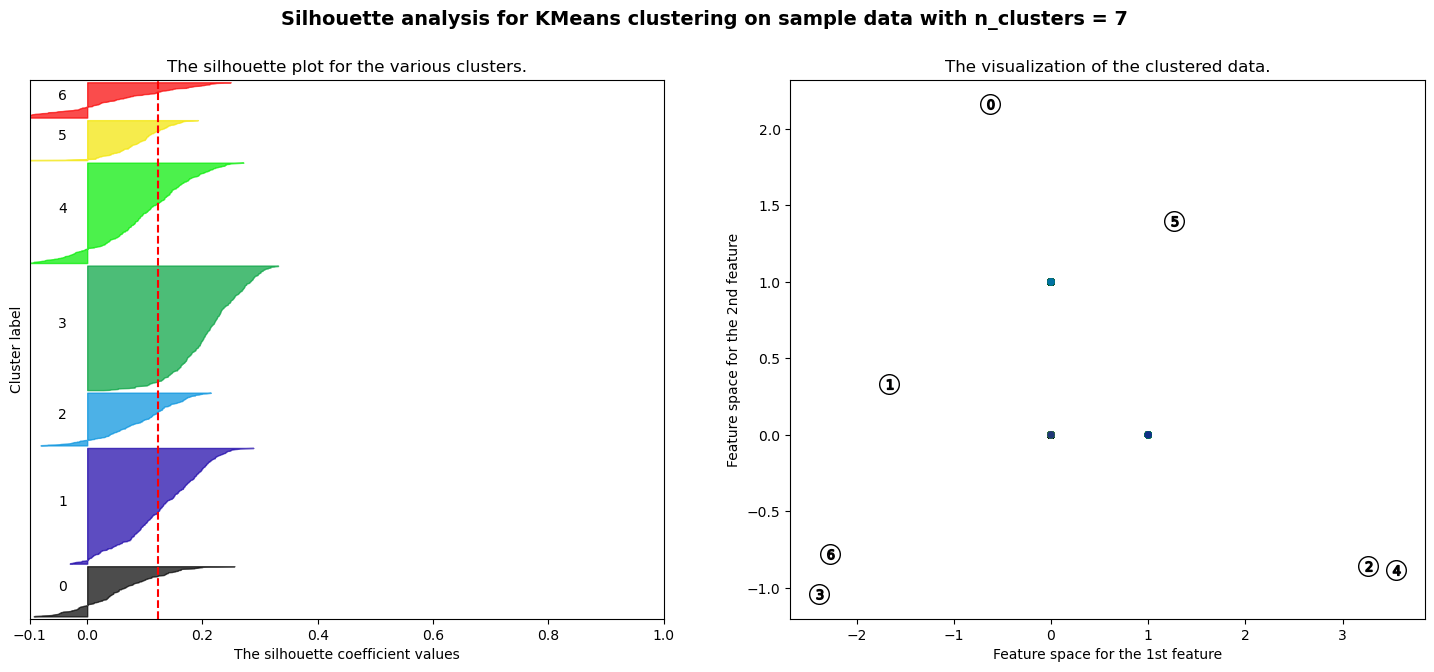

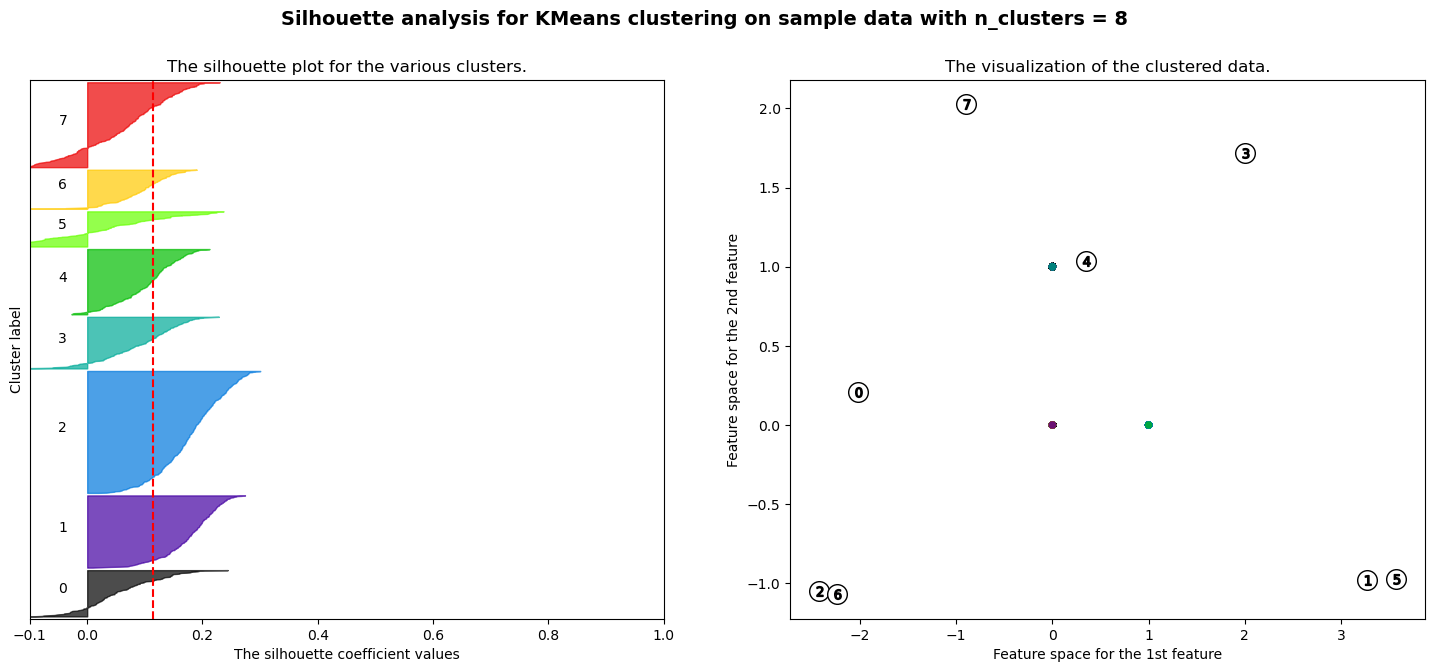

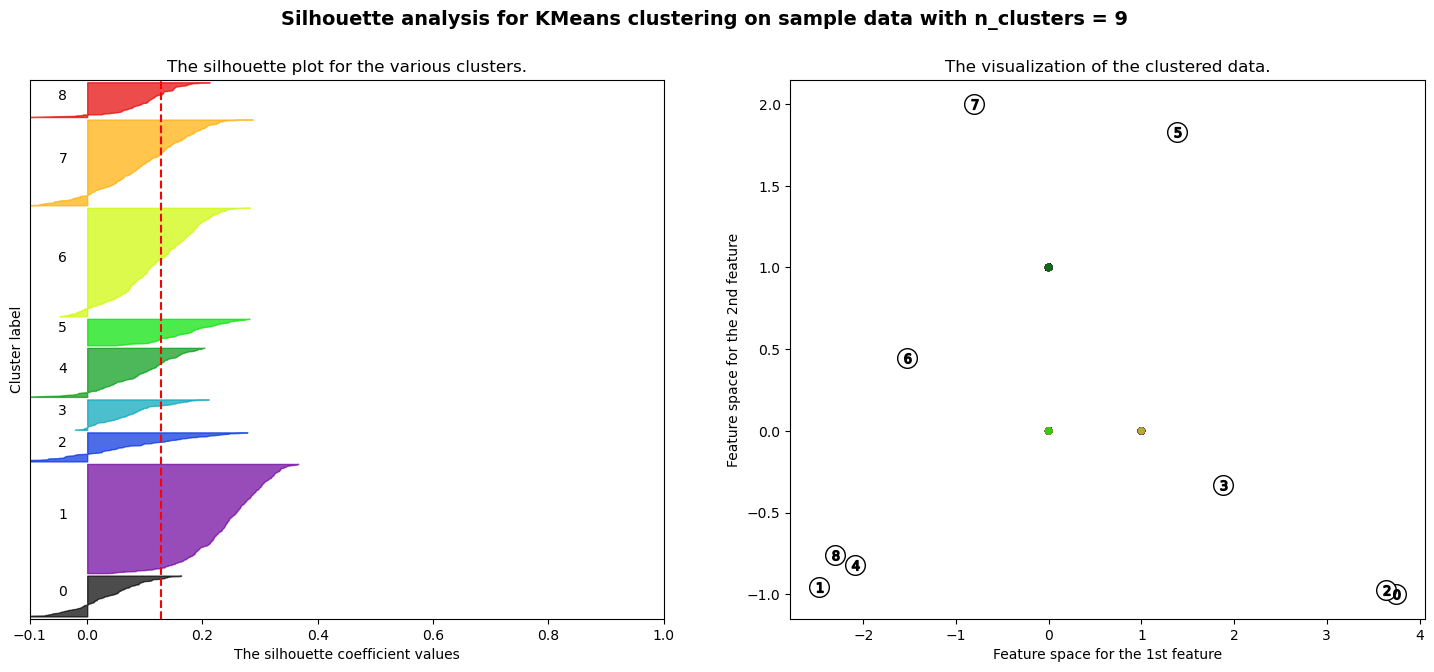

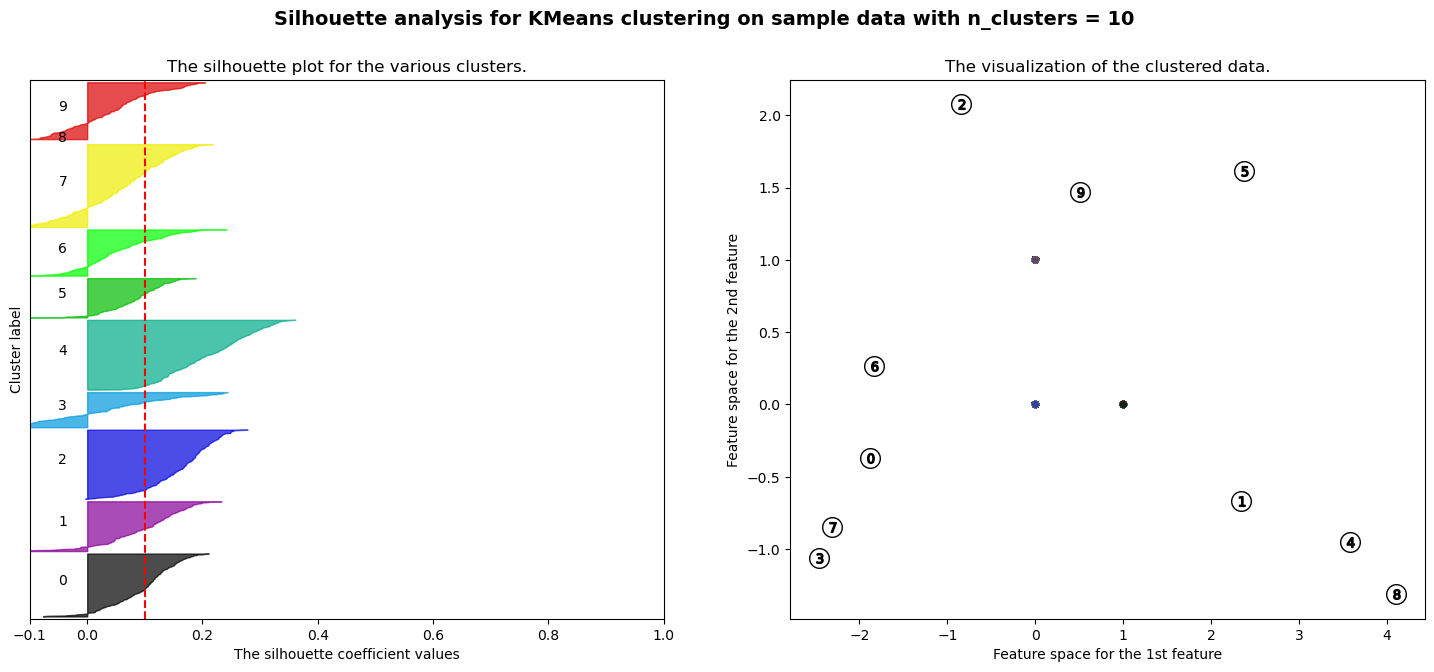

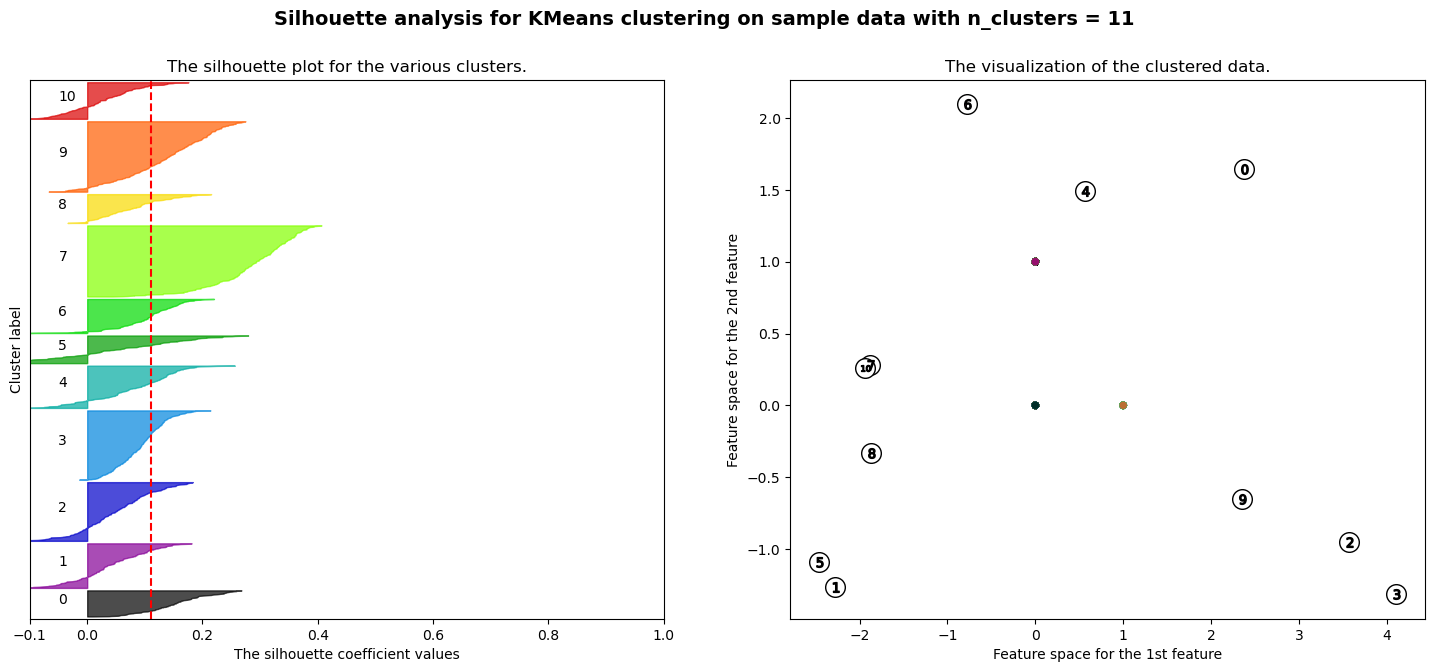

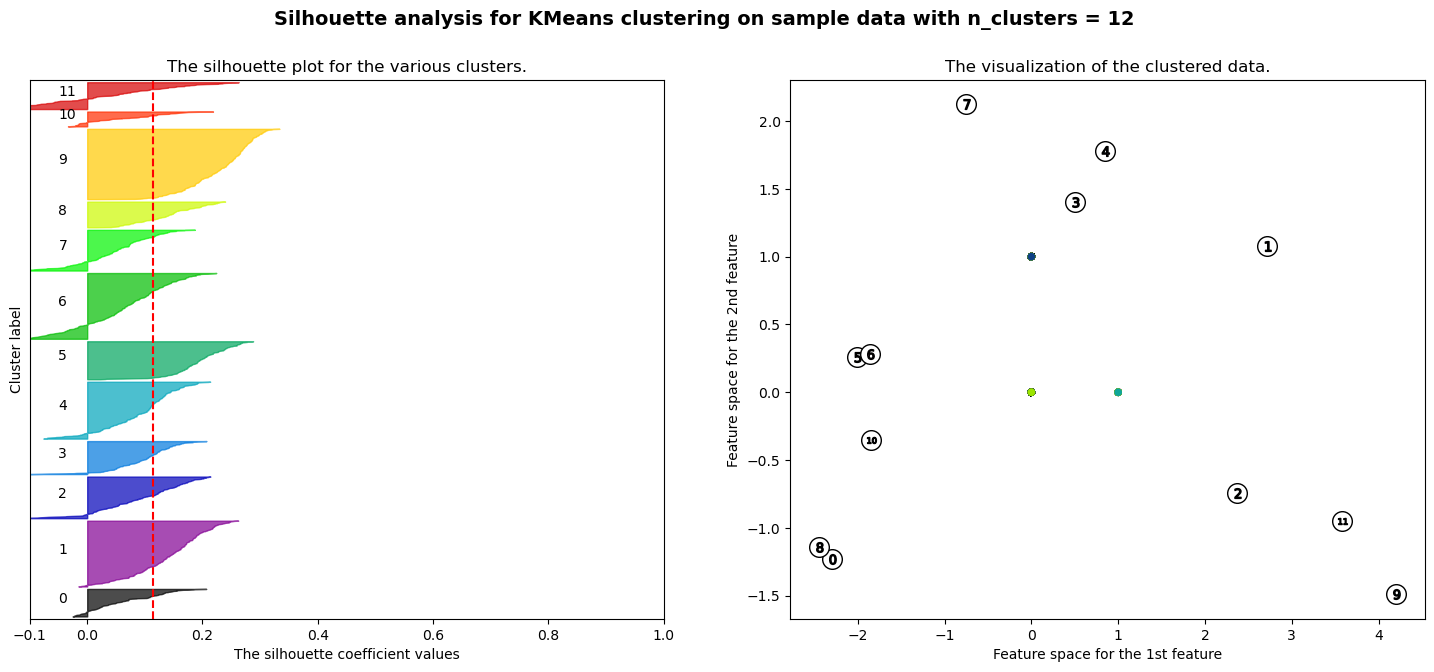

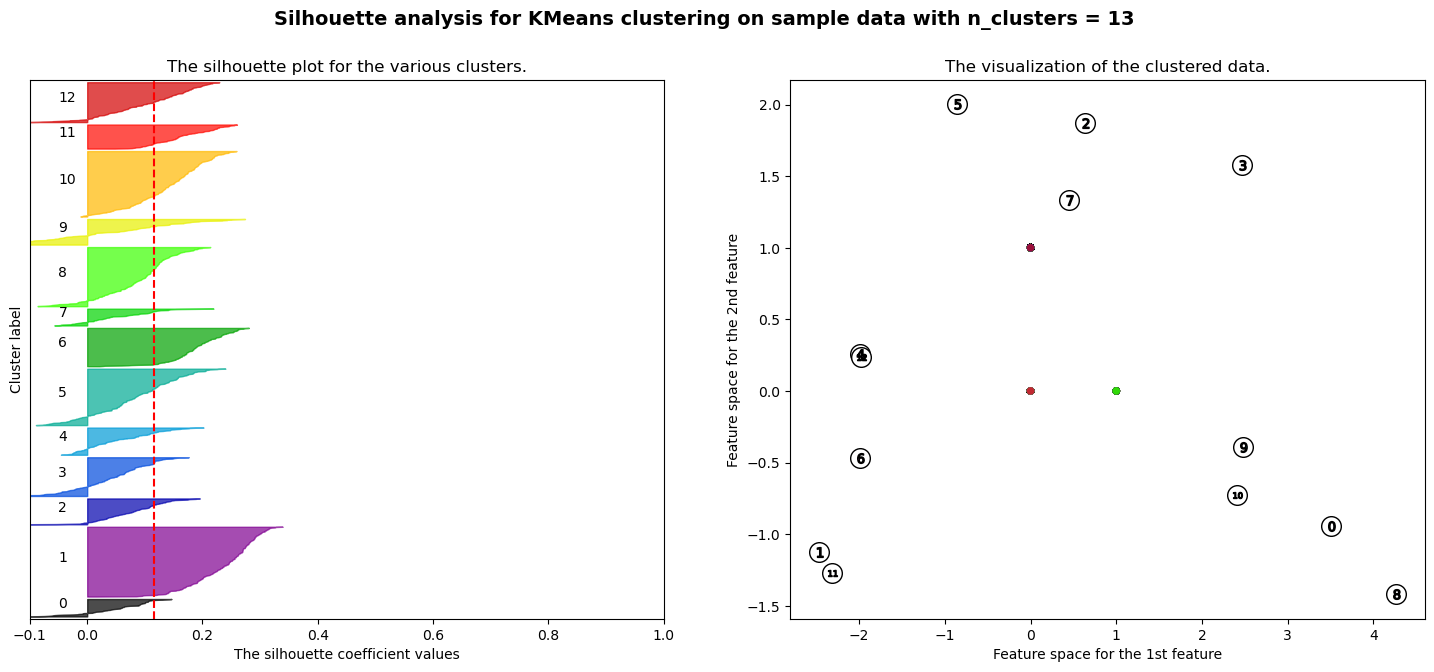

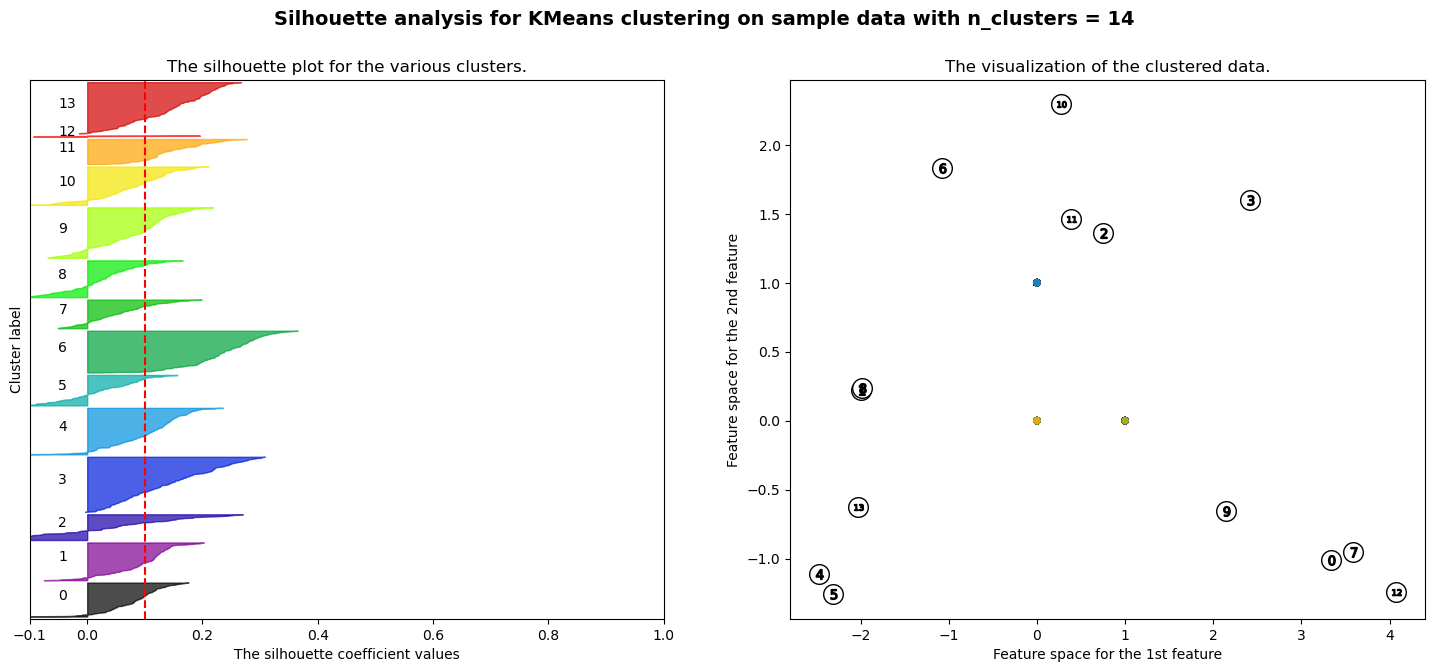

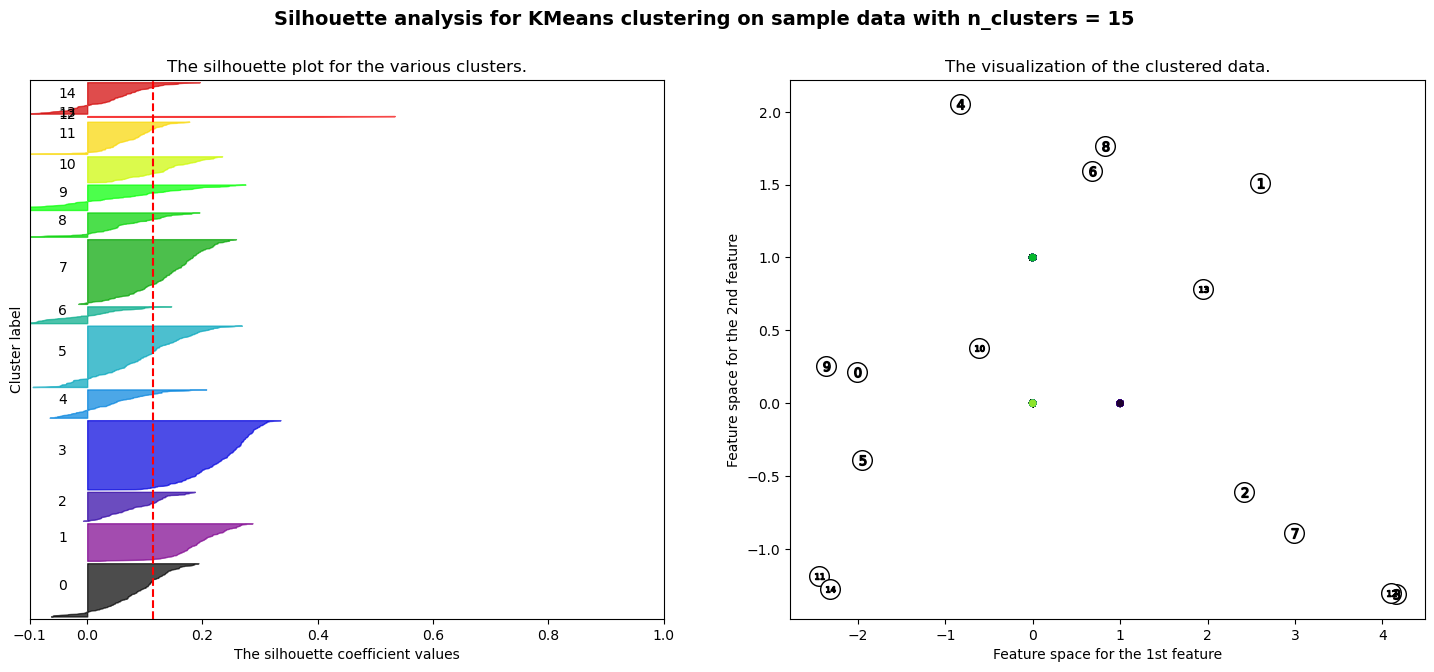

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
label_points = False
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xformed) + (n_clusters + 1) * 10])

    pipe1.named_steps.kmeans.set_params(n_clusters=n_clusters,random_state=42)
    clusterer = pipe1.named_steps.kmeans
    cluster_labels = pipe1.fit_predict(Xformed)
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(Xformed)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xformed[:, 0], Xformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    if label_points:
        for i,v in enumerate(Xformed):
            ax2.text(v[0],v[1],y.iloc[i][0],alpha=0.4)


    # Labeling the clusters
    centers = clusterer.cluster_centers_
    #print(centers)
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig('silhouette%02d.pdf' % n_clusters)
plt.show()

Insert your explanations and interpretations here.

## Task 8 (10 points):
Show the results of a t-SNE analysis of the dataset.  Experiment with a variety of perplexity values and explain your final choice.  As with the previous questions, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster?  How might you label the points in the t-SNE plot to show characteristics of each cluster?

In [ ]:
# insert your code here

Insert your explanations and interpretations here.

# NOTE
We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.